<a href="https://colab.research.google.com/github/DhanushSridhar26/FacialExpressionDetection/blob/master/Facial_expression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing 
Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras import utils
from tensorflow.keras import layers
from tensorflow import keras

**Loading Dataframe**


[Kaggle Data Set](https://www.kaggle.com/deadskull7/fer2013) Click to see



In [ ]:
df = pd.read_csv('/content/drive/My Drive/fer2013/fer2013.csv')

In [ ]:
ker

In [ ]:
new_df = []
new_df.append(str(df['pixels'][0]).split(" "))
new_df
df.head(20)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training
9,2,255 254 255 254 254 179 122 107 95 124 149 150...,Training


In [ ]:
df['Usage'].unique()

array(['Training', 'PublicTest', 'PrivateTest'], dtype=object)

In [ ]:
new_df.append(str(df['pixels'][2]).split(" "))
len(new_df)

2

In [ ]:
pd.DataFrame(new_df)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2264,2265,2266,2267,2268,2269,2270,2271,2272,2273,2274,2275,2276,2277,2278,2279,2280,2281,2282,2283,2284,2285,2286,2287,2288,2289,2290,2291,2292,2293,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,70,80,82,72,58,58,60,63,54,58,60,48,89,115,121,119,115,110,98,91,84,84,90,99,110,126,143,153,158,171,169,172,169,165,129,110,113,107,95,79,...,20,31,40,46,65,88,108,110,125,149,157,153,162,164,158,159,154,140,78,21,11,61,144,168,173,157,138,150,148,132,159,182,183,136,106,116,95,106,109,82
1,231,212,156,164,174,138,161,173,182,200,106,38,39,74,138,161,164,179,190,201,210,216,220,224,222,218,216,213,217,220,220,218,217,212,174,160,162,160,139,135,...,225,220,215,207,199,167,108,151,122,88,71,84,120,127,105,76,71,78,90,106,123,146,155,148,130,141,119,69,54,89,104,138,152,122,114,101,97,88,110,152


In [ ]:
df['emotion'].unique()

array([0, 2, 4, 6, 3, 5, 1])

**Pre-Processing**

In [ ]:
images_data = []
max_len = 0
for i in range(df.shape[0]):
  k=df['pixels'][i].split(" ")
  k=[int(x) for x in k]
  images_data.append(k)
  t=len(images_data[i])
  if t>max_len:
    max_len=t
print(max_len)
images_df = pd.DataFrame(images_data)

2304


In [ ]:
images_df['class'] = df['emotion']

In [ ]:
images_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2265,2266,2267,2268,2269,2270,2271,2272,2273,2274,2275,2276,2277,2278,2279,2280,2281,2282,2283,2284,2285,2286,2287,2288,2289,2290,2291,2292,2293,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303,class
0,70,80,82,72,58,58,60,63,54,58,60,48,89,115,121,119,115,110,98,91,84,84,90,99,110,126,143,153,158,171,169,172,169,165,129,110,113,107,95,79,...,31,40,46,65,88,108,110,125,149,157,153,162,164,158,159,154,140,78,21,11,61,144,168,173,157,138,150,148,132,159,182,183,136,106,116,95,106,109,82,0
1,151,150,147,155,148,133,111,140,170,174,182,154,153,164,173,178,185,185,189,187,186,193,194,185,183,186,180,173,166,161,147,133,172,151,114,161,161,146,131,104,...,129,143,135,115,102,111,124,112,109,132,146,135,149,148,143,163,156,159,150,139,128,116,125,133,109,130,147,130,121,105,108,95,108,102,67,171,193,183,184,0
2,231,212,156,164,174,138,161,173,182,200,106,38,39,74,138,161,164,179,190,201,210,216,220,224,222,218,216,213,217,220,220,218,217,212,174,160,162,160,139,135,...,220,215,207,199,167,108,151,122,88,71,84,120,127,105,76,71,78,90,106,123,146,155,148,130,141,119,69,54,89,104,138,152,122,114,101,97,88,110,152,2
3,24,32,36,30,32,23,19,20,30,41,21,22,32,34,21,19,43,52,13,26,40,59,65,12,20,63,99,98,98,111,75,62,41,73,118,140,192,186,187,188,...,150,161,167,169,167,162,164,169,181,172,168,169,170,174,179,180,182,196,208,226,230,140,113,114,125,135,141,172,214,174,126,132,132,133,136,139,142,143,142,4
4,4,0,0,0,0,0,0,0,0,0,0,0,3,15,23,28,48,50,58,84,115,127,137,142,151,156,155,149,153,152,157,160,162,159,145,121,83,58,48,38,...,27,19,13,11,22,37,48,55,67,88,95,112,118,123,141,157,174,181,185,184,179,176,171,155,128,105,10,0,0,12,34,31,31,31,27,31,30,29,30,6


In [ ]:
temp = np.array(images_df.iloc[15,:2304]).reshape(48,48)

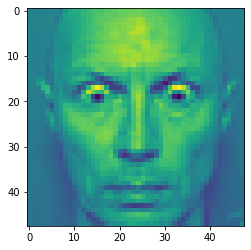

In [ ]:
plt.imshow(temp)

In [ ]:
'''for i in range(10):
  temp = np.array(images_df.iloc[i,:2304]).reshape(48,48)
  plt.imshow(temp)
  plt.show()'''

'for i in range(10):\n  temp = np.array(images_df.iloc[i,:2304]).reshape(48,48)\n  plt.imshow(temp)\n  plt.show()'

In [ ]:
from sklearn.model_selection import train_test_split


X = images_df.drop(['class'],axis=1)/255.0
y=images_df['class']
xtrval ,xts,ytrval,yts = train_test_split(X,y,test_size=0.2,random_state= 2)

In [ ]:
yts.shape

(7178,)

In [ ]:
xtr,xval,ytr,yval = train_test_split(xtrval,ytrval,test_size=0.2,random_state= 2)

**Creating Model**

In [ ]:
model = Sequential()

model.add(layers.Conv2D(filters=32,kernel_size = (2,2),input_shape=(48,48,1)))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(filters=64,kernel_size = (2,2),input_shape=(48,48,1)))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(filters=128,kernel_size = (2,2),input_shape=(48,48,1)))

model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(filters=256,kernel_size = (2,2),input_shape=(48,48,1)))

model.add(layers.MaxPool2D((2,2)))


model.add(layers.Flatten())

model.add(layers.Dense(1000,activation='relu'))
model.add(layers.Dense(1000,activation='relu'))

model.add(layers.Dense(500,activation='relu'))
model.add(layers.Dense(200,activation='relu'))
model.add(layers.Dense(200,activation='relu'))

model.add(layers.Dense(200,activation='relu'))

model.add(layers.Dense(7,activation='softmax'))



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 47, 47, 32)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 128)       32896     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 256)         1

In [ ]:
xtr=np.array(xtr).reshape(22967,48,48,1)
xval= np.array(xval).reshape(5742,48,48,1)
yval=np.array(yval).reshape(5742,)
ytr=np.array(ytr).reshape(22967,)

In [ ]:
print(xval.shape)
print(yval.shape)
print(xtr.shape)
print(ytr.shape)

(5742, 48, 48, 1)
(5742,)
(22967, 48, 48, 1)
(22967,)


**Compiling - Model Training**

In [ ]:
model.compile(loss='SparseCategoricalCrossentropy',optimizer='adam',metrics=['accuracy'])

best = keras.callbacks.ModelCheckpoint('model.h5',best_model_only = True)
early_stop = keras.callbacks.EarlyStopping(patience=15,
                                                  restore_best_weights=True)

model_hist = model.fit(xtr,ytr,epochs=200,validation_data=(xval,yval),callbacks = [best,early_stop])

Epoch 1/200
718/718 [==============================] - 9s 12ms/step - loss: 1.6631 - accuracy: 0.3265 - val_loss: 1.4865 - val_accuracy: 0.4157
Epoch 2/200
718/718 [==============================] - 8s 11ms/step - loss: 1.4358 - accuracy: 0.4358 - val_loss: 1.3831 - val_accuracy: 0.4667
Epoch 3/200
718/718 [==============================] - 8s 11ms/step - loss: 1.2876 - accuracy: 0.5059 - val_loss: 1.2754 - val_accuracy: 0.5207
Epoch 4/200
718/718 [==============================] - 8s 11ms/step - loss: 1.1709 - accuracy: 0.5537 - val_loss: 1.2273 - val_accuracy: 0.5282
Epoch 5/200
718/718 [==============================] - 8s 11ms/step - loss: 1.0417 - accuracy: 0.6047 - val_loss: 1.2476 - val_accuracy: 0.5430
Epoch 6/200
718/718 [==============================] - 8s 11ms/step - loss: 0.9178 - accuracy: 0.6616 - val_loss: 1.2628 - val_accuracy: 0.5467
Epoch 7/200
718/718 [==============================] - 8s 11ms/step - loss: 0.7775 - accuracy: 0.7154 - val_loss: 1.3449 - val_accuracy:

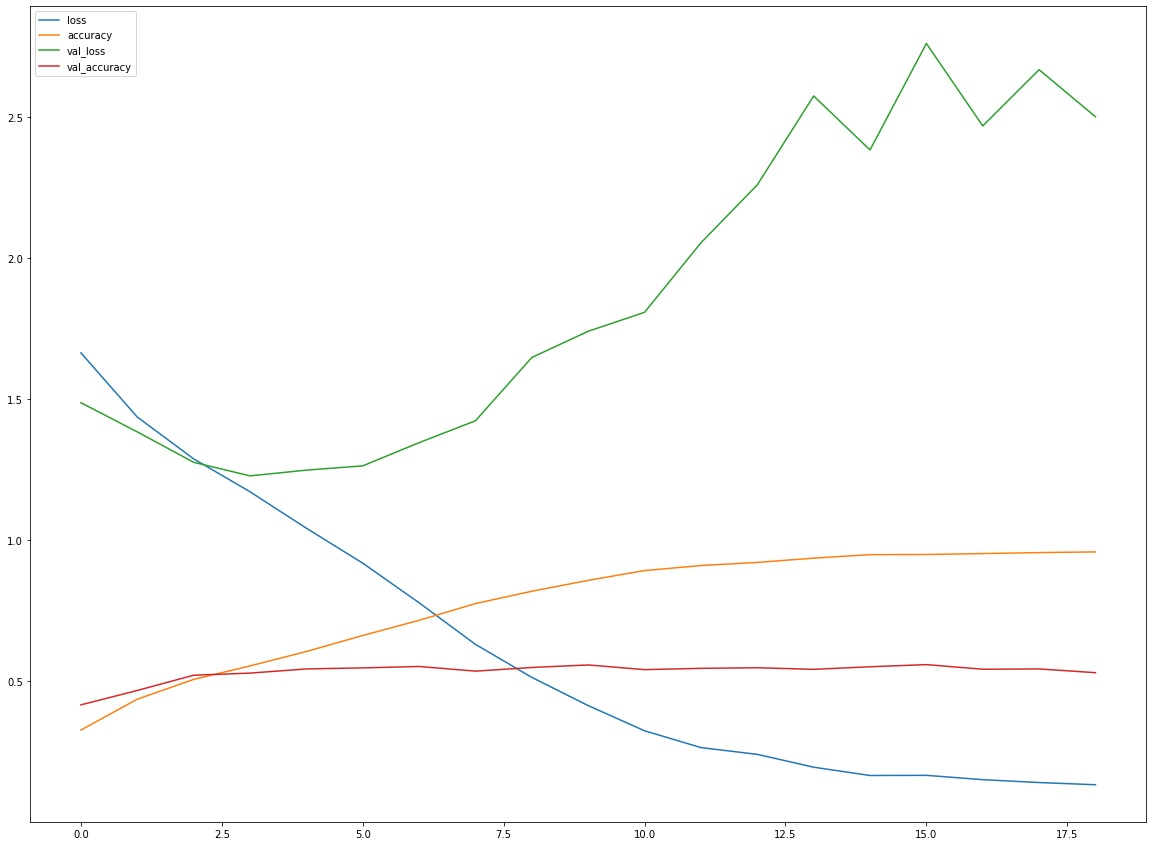

In [ ]:
pd.DataFrame(model_hist.history).plot(figsize=(20,15))

In [ ]:
#Save Model in h5 file

In [ ]:
model.save("model.h5")

In [ ]:
# Load Model from that file

In [ ]:
model = keras.models.load_model('model.h5')

In [ ]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

img = cv2.imread('/content/anger.jpg',0)
faces = face_cascade.detectMultiScale(img, 1.3, 5)
faces
x1=faces[0][0]
y1=faces[0][1]
x2=x1+faces[0][2]
y2=y1+faces[0][3]

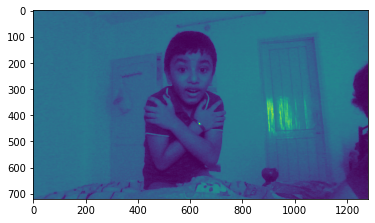

In [ ]:
x=cv2.imread('/content/e.jpg',0)

plt.imshow(x)

In [ ]:
y=cv2.resize(img[y1:y2,x1:x2],(48,48))

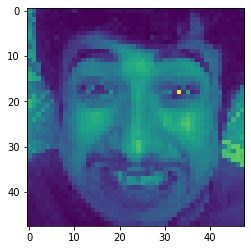

In [ ]:
plt.imshow(y)

In [ ]:
#y.resize(48,48)
y.shape

(48, 48)

In [ ]:
y=y.reshape(1,48,48,1)

In [ ]:
k = model.predict_classes(y)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
k[0]

2

In [ ]:
l = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

In [ ]:
l[k[0]]

'Fear'